# Setup

In [1]:
# Core Data Science Imports
import numpy as np
import pandas as pd

# Statistical Modeling (statsmodels)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

# Visualization
import matplotlib.pyplot as plt

# Configuration/Styles
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.style.use('fivethirtyeight')

**1. Core Data Science Imports:**

*   `import numpy as np`:  Imports the NumPy library, which is fundamental for numerical computing in Python. It provides support for arrays, mathematical functions, and random number generation. `np` is a common alias used for brevity.
*   `import pandas as pd`: Imports the Pandas library, essential for data manipulation and analysis. It introduces DataFrames, which are tabular data structures with labeled rows and columns, making it easy to work with structured data.  `pd` is the standard alias.

**2. Statistical Modeling (statsmodels):**

This section imports modules from `statsmodels`, a Python library focused on statistical modeling, econometrics, and time series analysis.

*   `from statsmodels.graphics.tsaplots import plot_acf, plot_pacf`: Imports functions for plotting Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF). These plots are crucial for identifying the order of autoregressive (AR) and moving average (MA) components in time series models like ARIMA.
    *   `plot_acf()`:  Visualizes the autocorrelation between a time series and its lagged values.
    *   `plot_pacf()`: Visualizes the partial autocorrelation, which shows the correlation between a time series and its lagged values after removing the effects of intermediate lags.

*   `from statsmodels.tsa.seasonal import seasonal_decompose`: Imports `seasonal_decompose`, a function used to decompose a time series into its trend, seasonality, and residual components. This is helpful for understanding the underlying patterns in the data.

*   `from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt`:  Imports classes related to exponential smoothing methods:
    *   `SimpleExpSmoothing`: Implements simple exponential smoothing, a basic method for forecasting time series without trend or seasonality.
    *   `ExponentialSmoothing`: Implements double exponential smoothing (Holt's linear trend method), which handles data with a trend but no seasonality.
    *   `Holt`:  Implements Holt-Winters' seasonal method, which can handle both trend and seasonality in time series data.

**3. Visualization:**

*   `import matplotlib.pyplot as plt`: Imports the `pyplot` module from Matplotlib, a powerful library for creating static, interactive, and animated visualizations in Python. `plt` is the standard alias.

**4. Configuration/Styles:**

*   `import warnings`:  Imports the `warnings` module to manage warning messages that might be generated during code execution.
*   `warnings.simplefilter(action='ignore', category=FutureWarning)`: Suppresses `FutureWarning` messages. These warnings indicate that certain features or syntax are deprecated and will likely change in future versions of the libraries.  Ignoring them can make output cleaner, but it's generally good practice to address these warnings when possible for long-term code maintainability.
*   `plt.style.use('fivethirtyeight')`: Sets the default plotting style to 'fivethirtyeight'. This is a visually appealing style often used in data journalism and provides a consistent look for plots.  It's defined within Matplotlib.


In [2]:
class CFG:
    data_folder = './data/'
    img_dim1 = 20
    img_dim2 = 10

# Adjust parameters for displayed figures
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

This code defines a configuration class `CFG` and then uses its attributes to adjust the default size of plots created with Matplotlib.  

**1. Class Definition:**

*   `class CFG:`: This defines a class named `CFG`.  Classes are blueprints for creating objects. In this case, `CFG` is used to hold configuration parameters related to the project. It's a common practice in Python projects to group related settings into a dedicated configuration object.
*   `data_folder = './data/'`: This defines an attribute of the `CFG` class called `data_folder`.  It stores the path to the directory where data files are located. The `./data/` means "a folder named 'data' in the current working directory."
*   `img_dim1 = 20`: Defines an attribute `img_dim1`, representing the desired width of images or figures (in this context, plots we will for visualization).  The value is set to 20.
*   `img_dim2 = 10`: Defines an attribute `img_dim2`, representing the desired height of images or figures. The value is set to 10.

**2. Adjusting Plot Size:**

*   `plt.rcParams`: This accesses the runtime configuration parameters of Matplotlib.  `rcParams` is a dictionary-like object that controls various aspects of how plots are rendered (colors, fonts, line styles, figure sizes, etc.).
*   `.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})`: This updates the dictionary with a new value:
    *   `'figure.figsize'`:  This key specifies the default size of figures created using Matplotlib. It expects a tuple representing (width, height) in inches.
    *   `(CFG.img_dim1, CFG.img_dim2)`: This provides the new figure size as a tuple.  It uses the values stored in the `img_dim1` and `img_dim2` attributes of the `CFG` class (which are 20 and 10 respectively).

# Functions

# Exponential smoothing

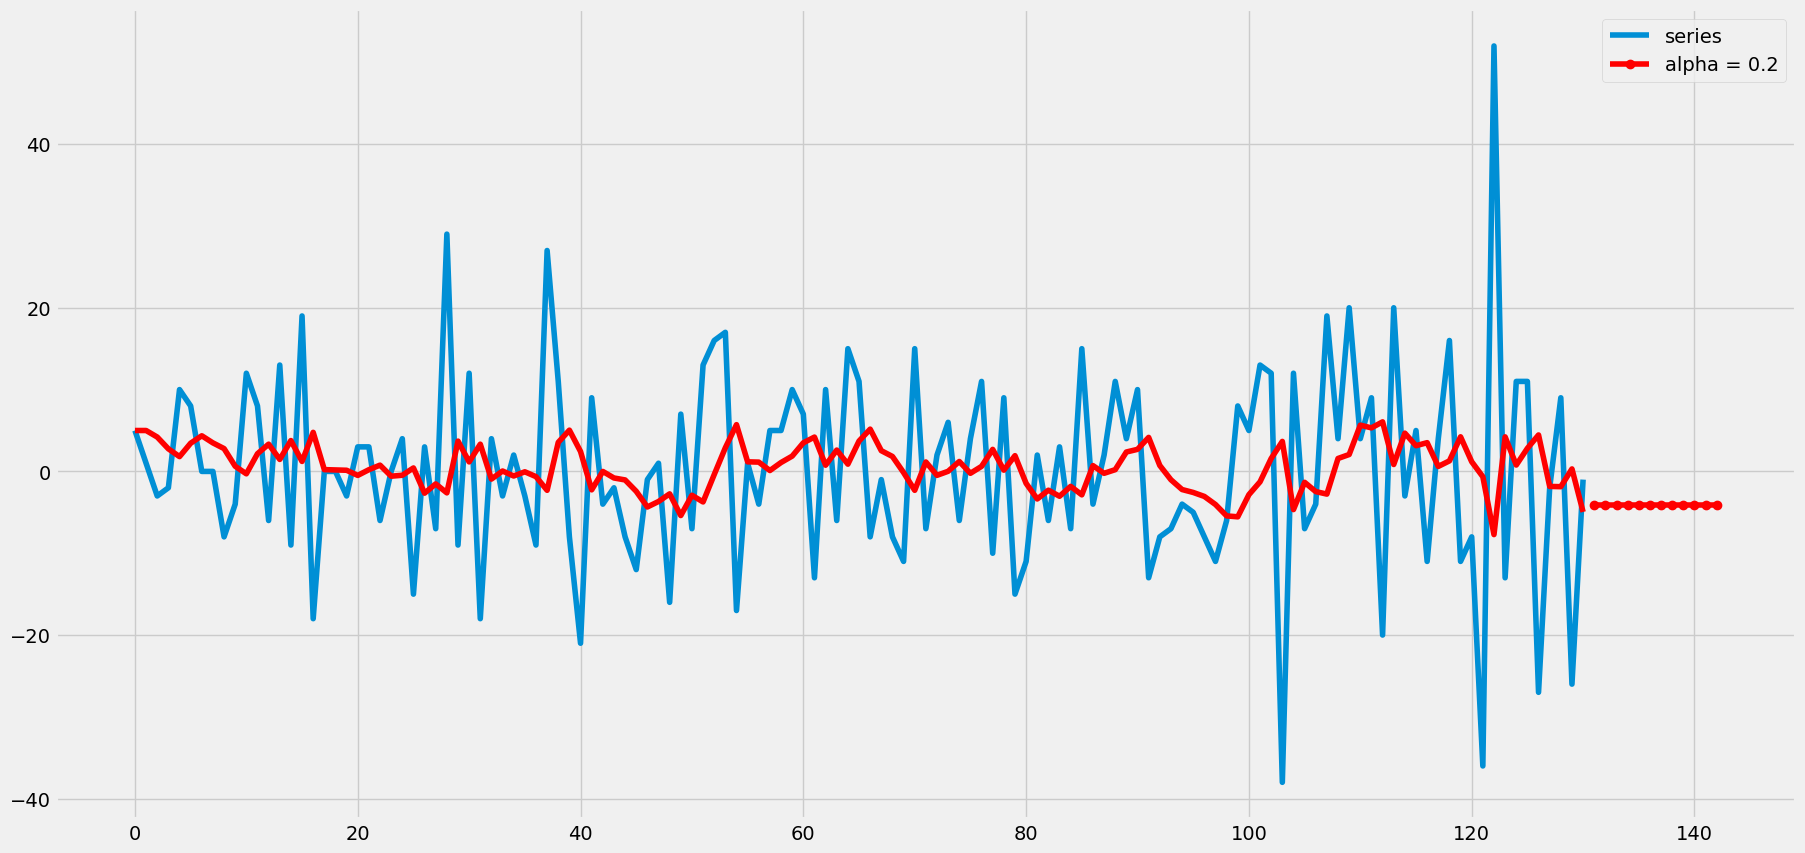

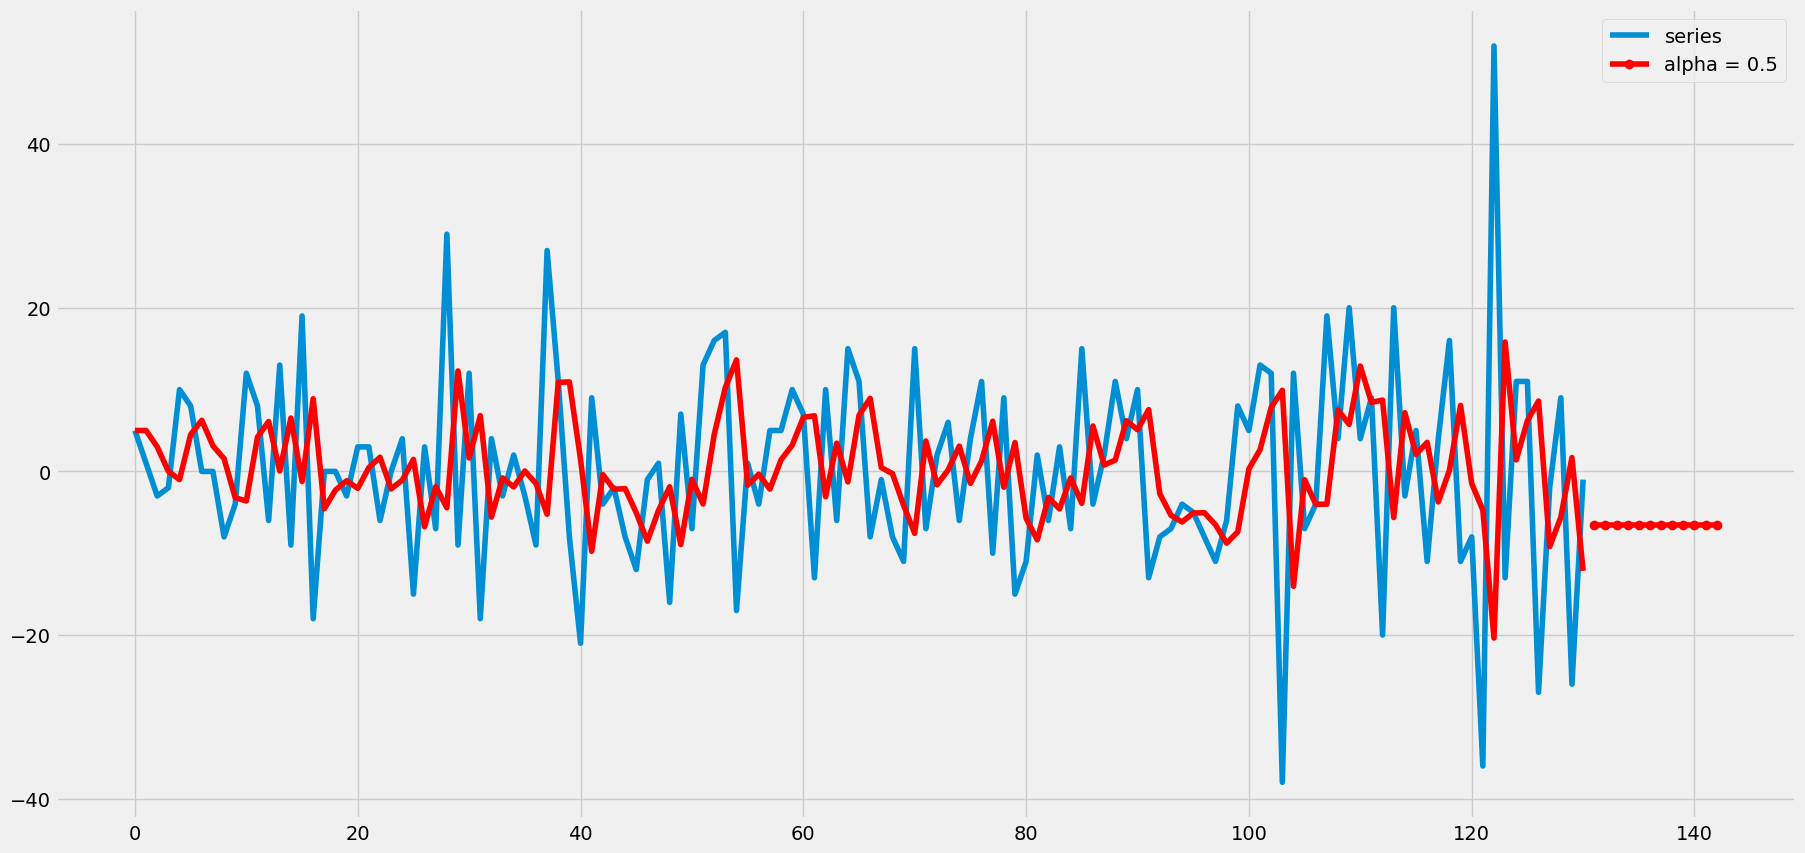

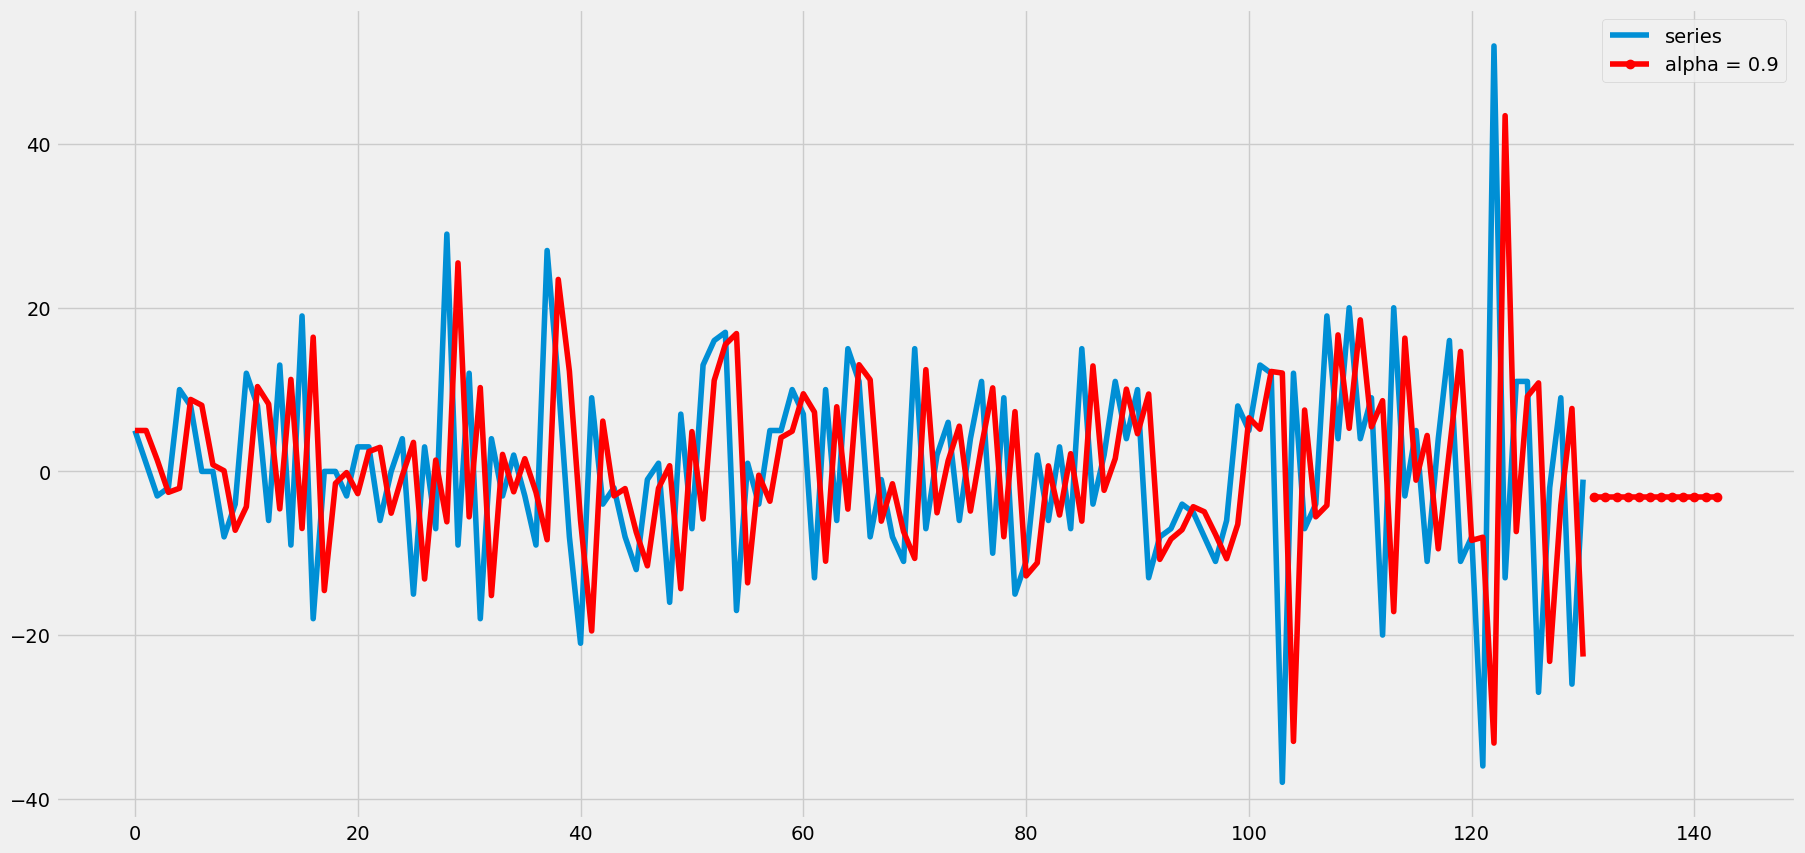

In [3]:
# synthetic data demonstration
for alpha_sm in [0.2 , 0.5, 0.9]:

    df = pd.read_csv(CFG.data_folder + 'exp1.csv', header = None); df.columns = ['series']
    df.plot.line()
    fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm  ,optimized=False)
    fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))
    fcast1.plot(marker='o', color='red', legend=True)
    fit1.fittedvalues.plot(  color='red')
    plt.show()

This code snippet performs simple exponential smoothing on a time series dataset for different values of the smoothing factor (alpha) and visualizes the results. Let's break it down step-by-step:

**1. Looping through Alpha Values:**

*   `for alpha_sm in [0.2 , 0.5, 0.9]:`: This loop iterates three times, with `alpha_sm` taking on the values 0.2, 0.5, and 0.9 in each iteration.  `alpha_sm` represents the smoothing level (or alpha) used in the exponential smoothing model.

**2. Data Loading:**

*   `df = pd.read_csv(CFG.data_folder + 'exp1.csv', header = None); df.columns = ['series']`:
    *   `pd.read_csv(...)`: Reads a CSV file named "exp1.csv" into a Pandas DataFrame called `df`.
    *   `CFG.data_folder`:  This assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located. This makes the code more flexible and easier to manage if the data location changes.
    *   `header = None`:  Specifies that the CSV file does *not* have a header row.
    *   `df.columns = ['series']`: Assigns the column name "series" to the single column in the DataFrame.

**3. Initial Plotting:**

*   `df.plot.line()`: Creates a line plot of the original time series data stored in the 'series' column of the DataFrame `df`. This provides a visual representation of the raw data before any smoothing is applied.

**4. Simple Exponential Smoothing and Forecasting:**

*   `fit1 = SimpleExpSmoothing(df).fit(smoothing_level = alpha_sm  ,optimized=False)`:
    *   `SimpleExpSmoothing(df)`: Creates an instance of the `SimpleExpSmoothing` class from `statsmodels`, initializing it with the time series data (`df`).
    *   `.fit(...)`: Fits the exponential smoothing model to the data.
        *   `smoothing_level = alpha_sm`: Sets the smoothing level (alpha) for this particular iteration of the loop.  Alpha controls how much weight is given to recent observations versus past observations. A higher alpha gives more weight to recent values, making the smoothed series more responsive to changes in the data.
        *   `optimized=False`: This crucial parameter tells `SimpleExpSmoothing` *not* to optimize the smoothing level (alpha).  The code explicitly sets the alpha value within the loop and doesn't want statsmodels to try to find a "best" alpha automatically.

*   `fcast1 = fit1.forecast(12).rename('alpha = ' + str(alpha_sm))`:
    *   `fit1.forecast(12)`:  Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to include the value of `alpha_sm`, making it easier to identify which alpha level produced each forecast.

**5. Plotting Forecasts and Fitted Values:**

*   `fcast1.plot(marker='o', color='red', legend=True)`: Plots the forecasted values (`fcast1`) as a red line with circular markers ('o').  `legend=True` ensures that the plot includes a legend to identify the forecast series.
*   `fit1.fittedvalues.plot(  color='red')`: Plots the fitted values (the smoothed time series) generated by the model. These represent the estimated values of the time series based on the exponential smoothing process. They are also plotted as a red line.

**6. Displaying the Plot:**

*   `plt.show()`: Displays the plot that has been created, showing the original time series, the fitted values (smoothed data), and the forecasts for each value of `alpha_sm`.  The loop will repeat this process three times, creating a separate plot for each alpha value.


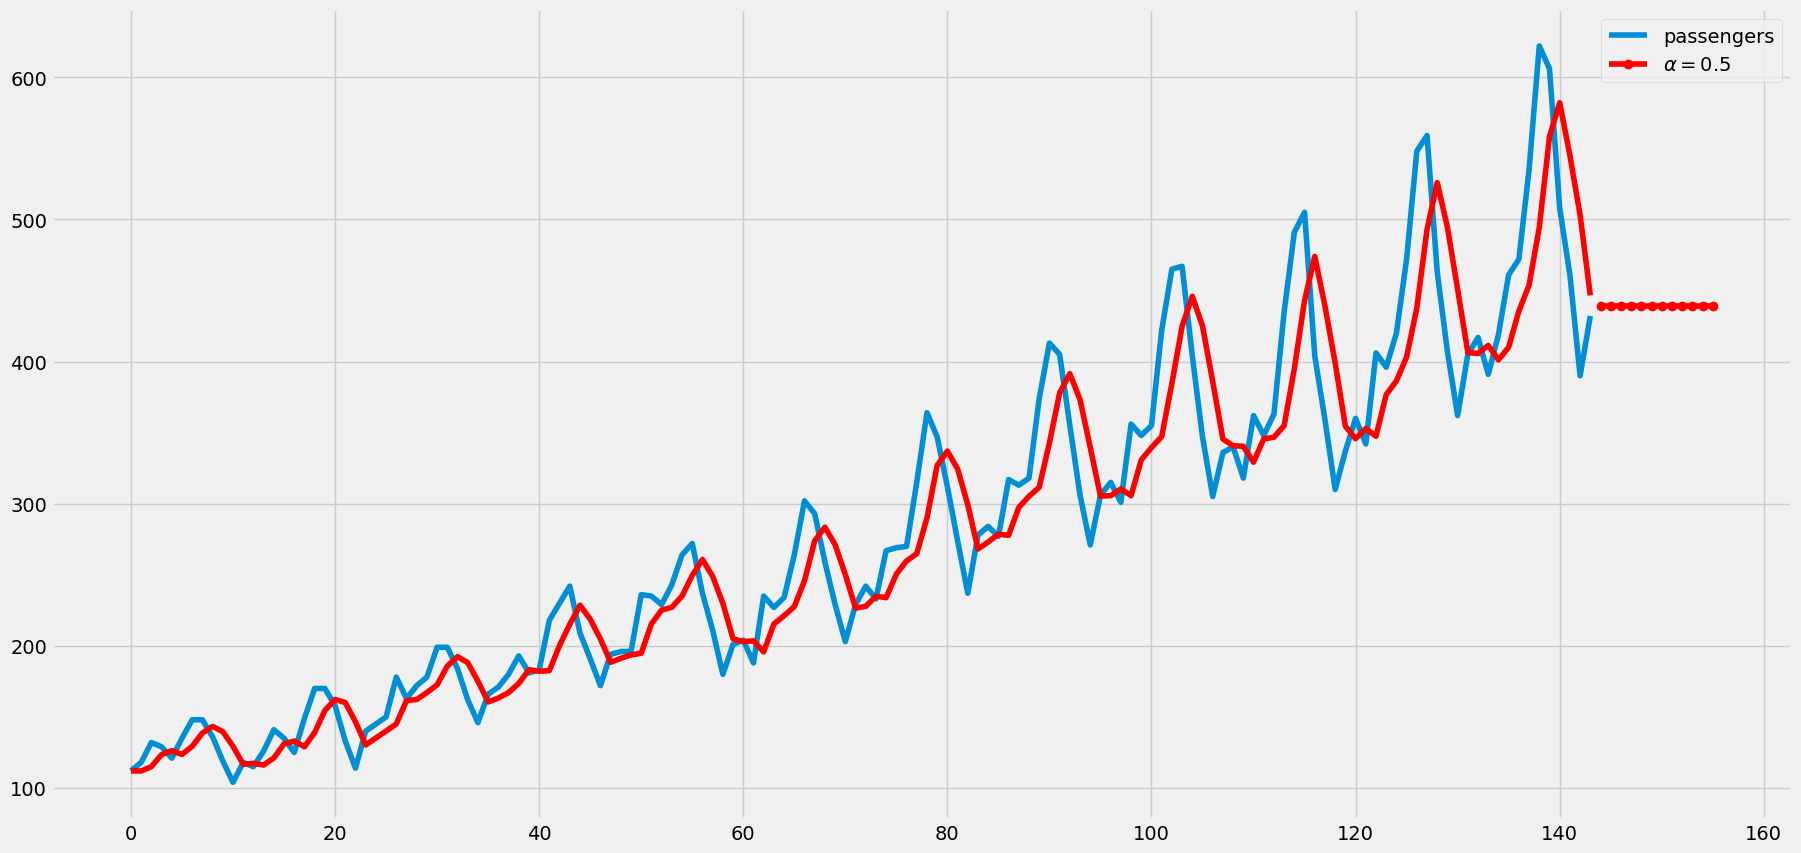

In [4]:
# applying to passenger dataset
alpha = 0.5

df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])
df.plot.line()
fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')
fcast1.plot(marker='o', color='red', legend=True)
fit1.fittedvalues.plot(  color='red')
plt.show()

This code snippet applies simple exponential smoothing to the "passengers" dataset, forecasts 12 periods into the future, and visualizes both the smoothed data (fitted values) and the forecast. Let's break it down:

**1. Setting Alpha:**

*   `alpha = 0.5`:  Sets the smoothing level (`alpha`) to 0.5. This value determines how much weight is given to recent observations versus past observations in the exponential smoothing process. A value of 0.5 means that each observation receives equal weight with the previous smoothed value.

**2. Data Loading:**

*   `df = pd.read_csv(CFG.data_folder + 'passengers.csv', usecols = ['passengers'])`:
    *   `pd.read_csv(...)`: Reads a CSV file named "passengers.csv" into a Pandas DataFrame called `df`.
    *   `CFG.data_folder`:  Assumes that there's a configuration object (likely defined elsewhere in the code) named `CFG`, which has an attribute `data_folder` containing the path to the directory where the data file is located.
    *   `usecols = ['passengers']`: Specifies that only the column named "passengers" should be read from the CSV file. This creates a DataFrame with a single column representing the passenger numbers.

**3. Initial Plotting:**

*   `df.plot.line()`: Creates a line plot of the original time series data stored in the 'passengers' column of the DataFrame `df`.  This shows the raw passenger data over time.

**4. Simple Exponential Smoothing and Forecasting:**

*   `fit1 = SimpleExpSmoothing(df).fit(smoothing_level= alpha,optimized=False)`:
    *   `SimpleExpSmoothing(df)`: Creates an instance of the `SimpleExpSmoothing` class from `statsmodels`, initializing it with the time series data (`df`).
    *   `.fit(...)`: Fits the exponential smoothing model to the data.
        *   `smoothing_level= alpha`: Sets the smoothing level (alpha) for this iteration, using the pre-defined value of 0.5.
        *   `optimized=False`:  This is important! It tells `SimpleExpSmoothing` *not* to optimize the smoothing level. The code explicitly sets alpha and doesn't want statsmodels to find a "best" alpha automatically.

*   `fcast1 = fit1.forecast(12).rename(r'$\alpha=0.5$')`:
    *   `fit1.forecast(12)`:  Uses the fitted model (`fit1`) to generate forecasts for the next 12 time steps (periods).
    *   `.rename(...)`: Renames the forecast series in the DataFrame to "α=0.5". The `r'$\alpha=0.5$'` uses a raw string and LaTeX formatting to display alpha as a Greek letter (α) in the legend, making it look more mathematically correct.

**5. Plotting Forecasts and Fitted Values:**

*   `fcast1.plot(marker='o', color='red', legend=True)`: Plots the forecasted values (`fcast1`) as a red line with circular markers ('o').  `legend=True` ensures that the plot includes a legend to identify the forecast series.
*   `fit1.fittedvalues.plot(  color='red')`: Plots the fitted values (the smoothed time series) generated by the model. These represent the estimated values of the time series based on the exponential smoothing process. They are also plotted as a red line.

**6. Displaying the Plot:**

*   `plt.show()`: Displays the plot that has been created, showing the original time series, the fitted values (smoothed data), and the forecasts for alpha = 0.5.